## Outlier Detection 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

t = np.arange(0, 2 * np.pi, 0.01)
x = np.sin(t)
y = np.cos(t)
inputs = np.stack((x, y), axis=1)
inputs.shape

(629, 2)

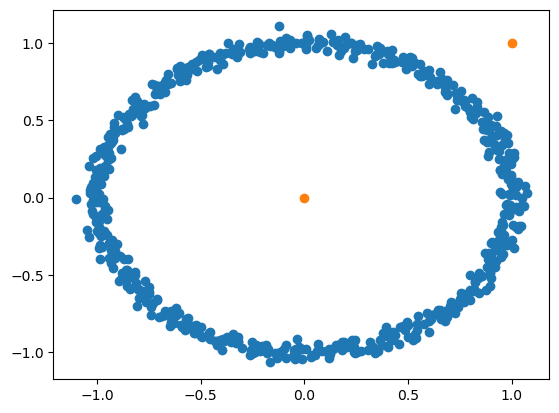

In [2]:
inputs += np.random.normal(0, size=inputs.shape) * 0.03
outliers = np.array([[0, 0], [1, 1]])
plt.scatter(inputs[:, 0], inputs[:, 1])
plt.scatter(outliers[:, 0], outliers[:, 1])

In [3]:
from   keras.models import Sequential, Model
from   keras.layers import Dense, Input
from   keras import optimizers
from   keras.optimizers import Adam

encoder = Sequential()
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(1))

decoder = Sequential()
decoder.add(Dense(16, activation="relu"))
decoder.add(Dense(16, activation="relu"))
decoder.add(Dense(2))

autoencoder = Sequential([encoder, decoder])

2023-11-02 08:03:23.732256: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 08:03:25.137017: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
autoencoder.compile(loss="mse")

In [5]:
ran_idxs = np.array(range(len(inputs)))
np.random.shuffle(ran_idxs)

In [6]:
# np.random.shuffle(inputs)

inputs = inputs[ran_idxs]

autoencoder.fit(inputs, inputs, validation_split=.2, epochs=500)

Epoch 1/500
16/16 [==============================] - 1s 10ms/step - loss: 0.5208 - val_loss: 0.4740
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4470 - val_loss: 0.4235
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 0.3961 - val_loss: 0.3652
Epoch 4/500
16/16 [==============================] - 0s 6ms/step - loss: 0.3386 - val_loss: 0.3025
Epoch 5/500
16/16 [==============================] - 0s 5ms/step - loss: 0.2863 - val_loss: 0.2570
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.2566 - val_loss: 0.2388
Epoch 7/500
16/16 [==============================] - 0s 5ms/step - loss: 0.2461 - val_loss: 0.2332
Epoch 8/500
16/16 [==============================] - 0s 4ms/step - loss: 0.2396 - val_loss: 0.2243
Epoch 9/500
16/16 [==============================] - 0s 4ms/step - loss: 0.2332 - val_loss: 0.2151
Epoch 10/500
16/16 [==============================] - 0s 5ms/step - loss: 0.2252 - val_loss: 0.2058
Epoch 11

20/20 [==============================] - 0s 2ms/step


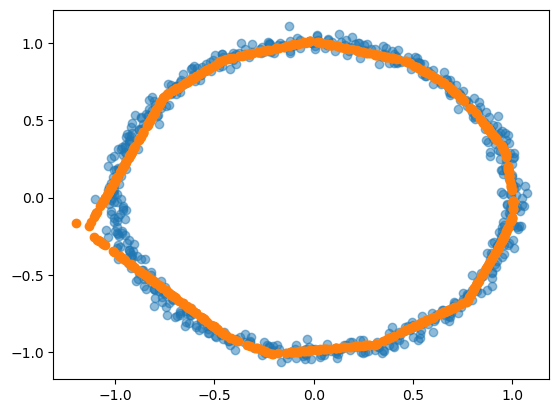

In [7]:
reconsturcted_points = autoencoder.predict(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], alpha=.5)
plt.scatter(reconsturcted_points[:, 0], reconsturcted_points[:, 1])

In [8]:
np.linalg.norm(inputs - reconsturcted_points, axis=1).mean()

0.08555002728215058

In [9]:
pred = autoencoder.predict(outliers)
pred

1/1 [==============================] - 0s 42ms/step


array([[0.8758556 , 0.44787848],
       [0.65078026, 0.7450163 ]], dtype=float32)

In [10]:
np.linalg.norm(outliers - pred, axis=1)

array([0.98372669, 0.43240158])

## Multidimensional

In [15]:
z = np.arange(0, 1, .000005)
x = z * np.sin(z * 20) 
y = z * np.cos(z * 20) 

# plotting
inputs = np.stack((x, y, z), axis=1)
inputs += np.random.normal(0, size=inputs.shape) * 0.005

inputs = (inputs - np.min(inputs)) / (np.max(inputs) - np.min(inputs))

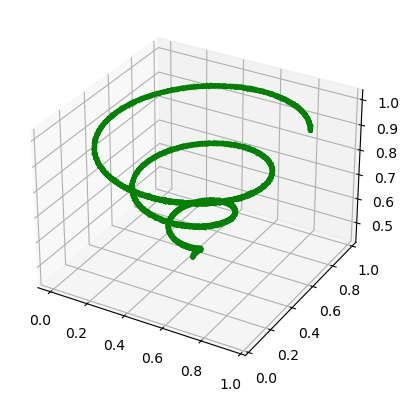

In [16]:
ax = plt.axes(projection ='3d')
ax.scatter3D(inputs[:, 0], inputs[:, 1], inputs[:, 2], color = "green", s=.5)
plt.show()

In [17]:
encoder = Sequential()
# encoder.add(Dense(1028, activation="relu"))
encoder.add(Dense(32, activation="relu"))
encoder.add(Dense(64, activation="relu"))
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(1))

decoder = Sequential()
decoder.add(Dense(16, activation="relu"))
decoder.add(Dense(64, activation="relu"))
decoder.add(Dense(32, activation="relu"))
# decoder.add(Dense(1028, activation="relu"))
decoder.add(Dense(3))

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mse")

In [18]:
np.random.shuffle(inputs)

history = autoencoder.fit(inputs, inputs, validation_split=.2, epochs=20, batch_size=16)

Epoch 1/20
10000/10000 [==============================] - 27s 3ms/step - loss: 0.0112 - val_loss: 0.0083
Epoch 2/20
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 3/20
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0077 - val_loss: 0.0083
Epoch 4/20
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0084 - val_loss: 0.0061
Epoch 5/20
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0063 - val_loss: 0.0042
Epoch 6/20
10000/10000 [==============================] - 26s 3ms/step - loss: 0.0047 - val_loss: 0.0066
Epoch 7/20
10000/10000 [==============================] - 27s 3ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 8/20
10000/10000 [==============================] - 12s 1ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 9/20
10000/10000 [==============================] - 10s 987us/step - loss: 0.0061 - val_loss: 0.0082
Epoch 10/20
10000/10000 [============================

In [19]:
encoder.summary(), decoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (16, 32)                  128       
                                                                 
 dense_15 (Dense)            (16, 64)                  2112      
                                                                 
 dense_16 (Dense)            (16, 16)                  1040      
                                                                 
 dense_17 (Dense)            (16, 1)                   17        
                                                                 
Total params: 3,297
Trainable params: 3,297
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (

(None, None)

6250/6250 [==============================] - 5s 759us/step


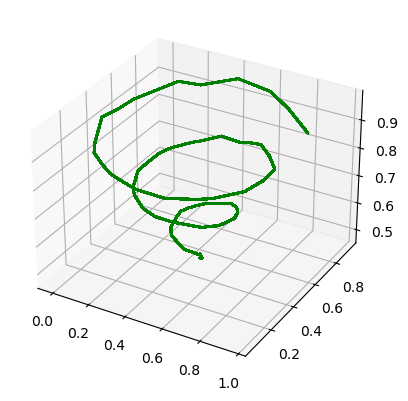

In [20]:
reconstructed_point = autoencoder.predict(inputs)
ax = plt.axes(projection ='3d')
ax.scatter3D(reconstructed_point[:, 0], reconstructed_point[:, 1], reconstructed_point[:, 2], color = "green", s=.5)
plt.show()
